<a href="https://colab.research.google.com/github/engomarwasfy/DIP/blob/main/Image_Cartoonifier_and_Coins_Detection_Using_Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import skimage.feature as sk
###########################################################################################################################################
def plot_image(image,color,title):
  plt.figure()
  plt.grid("false")
  plt.title(title)
  if(color=='colored'):
    plt.imshow(image)
  elif(color=="gray"):
    plt.imshow(image,cmap='gray')
  plt.figure()
###########################################################################################################################################
def BGR2RGB(image):
  return cv.cvtColor(image,cv.COLOR_BGR2RGB)
###########################################################################################################################################
def plot2Images(im1,im1_title,im2,im2_title):
  fig = plt.figure()
  ax1=fig.add_subplot(1,2,1)
  ax1.set_title(im1_title)
  ax1.grid(False)
  ax1.imshow(im1,cmap='gray')
  ax2=fig.add_subplot(1,2,2)
  ax2.set_title(im2_title)
  ax2.grid(False)
  ax2.imshow(im2,cmap='gray')
  plt.show()
###########################################################################################################################################
#Non maximum suppression 
#for introduced circle with parameters x,y,r if we return that this new circle is duplicate of another circle inside cirles array 
#given error -1 or +1 in any of x , y , r parameters and its permutations.technically speaking this kind of suppresion criteria does not depend on maximum response survive 
#but only the first survived respnse bigger than thershold is choosed but due to the nature of the problem we could argue that first thershold surviver has a higher change to have maximum respnose

def NMS(circle_x, circle_y, circle_r, circles):
      for circle in circles:
          if circle == (circle_x, circle_y, circle_r):
              return True
          elif circle == (circle_x + 1, circle_y, circle_r) or circle == (circle_x - 1, circle_y, circle_r):
              return True
          elif circle == (circle_x, circle_y + 1, circle_r) or circle == (circle_x, circle_y - 1, circle_r):
              return True
          elif circle == (circle_x, circle_y, circle_r + 1) or circle == (circle_x, circle_y, circle_r - 1):
              return True
          elif circle == (circle_x + 1, circle_y + 1, circle_r) or circle == (circle_x - 1, circle_y - 1, circle_r):
              return True
          elif circle == (circle_x + 1, circle_y, circle_r + 1) or circle == (circle_x - 1, circle_y, circle_r - 1):
              return True
          elif circle == (circle_x, circle_y + 1, circle_r + 1) or circle == (circle_x, circle_y - 1, circle_r - 1):
              return True
          elif circle == (circle_x + 1, circle_y + 1, circle_r + 1) or circle == (circle_x - 1, circle_y - 1, circle_r - 1):
              return True
      return False
###########################################################################################################################################
#given binary valued image of 0,255 
#given that for angles from 0 to 180 a point x,y would vote for circles of centers given these equations
#a= x + r cos theta for theta ranges 0 to 360 and step = 2 degress and for r ranges from 1 to #rows/2 (maximum cirle fitted entiry inside image if #rows = #cols)
#b= y+ r sin theta for theta ranges 0 to 360 and step = 2 degress and for r ranges from 1 to #rows/2 
# for each r we select the maximum a,b votes ,maximum candidate circle and we suppress it if votes is below search_threshold , if it survived this condition we check that it is
#not existed as duplicate for another added circle inside circles array by NMS function above

def CHT(image, search_threshold):
    import numpy as np
    (rows, columns) = image.shape
    angle = 0
    angle_count = 180
    angle_step_size = int(360/angle_count)
    radius_min = 1
    circles = []
    circles_radias = []
    radius_max = int(rows/2)
    sin_angles = np.zeros(angle_count)
    cosin_angles = np.zeros(angle_count)
    for index in range(0, angle_count):
        sin_angles[index] = np.sin(angle * np.pi/180) 
        cosin_angles[index] = np.cos(angle * np.pi/180)
        angle = angle + angle_step_size
    radius = np.array([i for i in range(radius_min, radius_max)])
    radiusVisuallization=  np.array([i for i in range(0, radius_max)])
    votesVisulization= np.zeros(radius_max)
    for r in radius:
        votes = np.array(np.full((rows, columns), fill_value=0, dtype=np.uint64))
        for x in range(rows):
            for y in range(columns):
                if (image[x][y] == 255):
                    for angle in range(0, 180):
                        a = int(x + round(r * cosin_angles[angle]))
                        b = int(y + round(r * sin_angles[angle]))
                        if a >= 0 and a < rows and b >= 0 and b < columns: 
                            votes[a][b] = votes[a][b] + 1
                else:
                    continue     
        max_vote = np.amax(votes)
        votesVisulization[r]=max_vote
        if (max_vote > search_threshold):
            votes[votes < search_threshold] = 0
            for x in range(rows):
                for y in range(columns):
                    if (votes[x][y] != 0):
                        if NMS(x, y, r, circles) == False:
                            circles.append((x, y, r))
                            circles_radias.append(r)
    import numpy as np
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(1)
    #what we would see is 3 peaks at r vs votes plot suggesting that all votes come to 3 unique Radius which in our case is the .25,.5,1 pound
    #we would also find in some images that another peeks at small r=1 and other r's but the fact that the correct 
    #3 radiuses are the maximal 3 votes 
    #if the images had more noises the problem will be harder but solvable as the photos taken vertical to plane which coin reside ,we have a known ratios between radiuses of 3 coins 
    # which is preserved in that uniform scaller transformation so if we searched for 3 radiuses peaks that have the same ratios they are likely to be our coins
    ax.plot(radiusVisuallization,votesVisulization)
    return circles, circles_radias
    

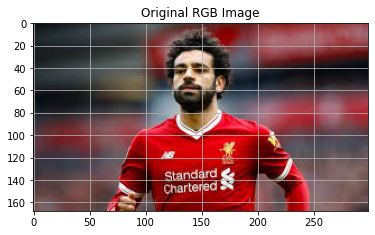

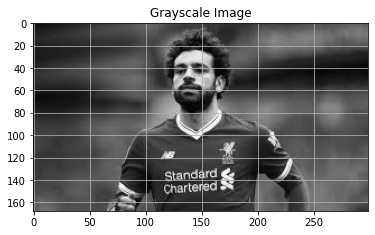

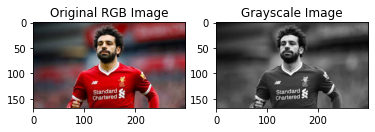

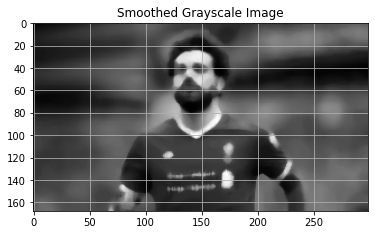

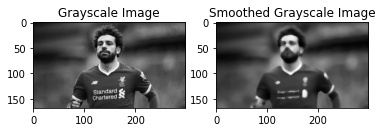

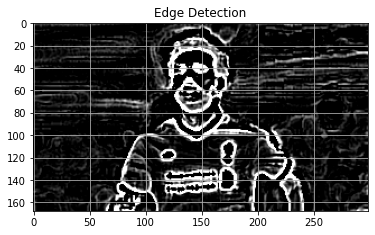

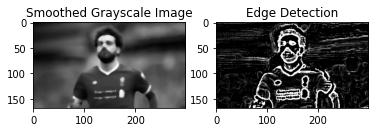

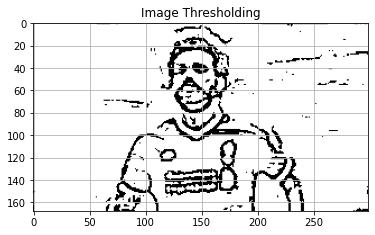

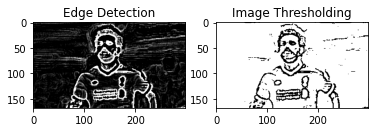

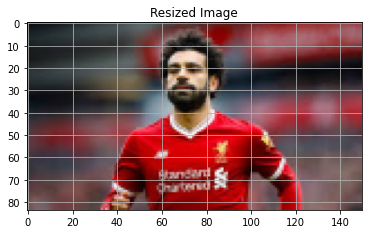

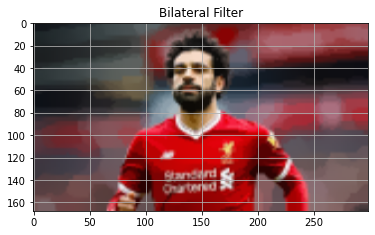

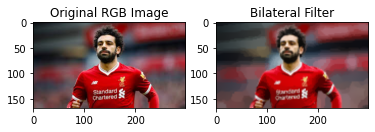

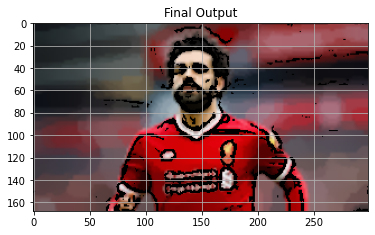

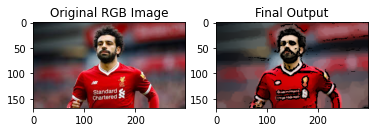

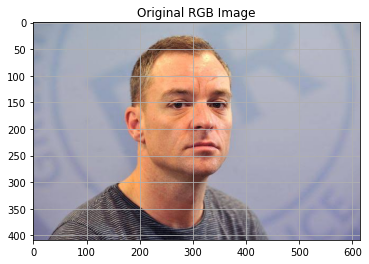

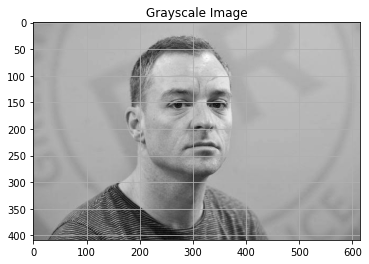

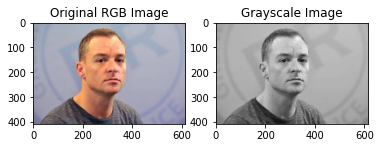

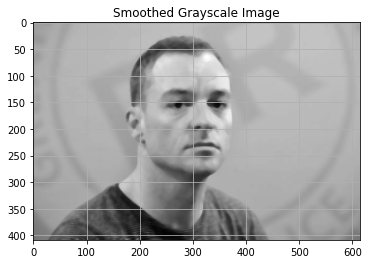

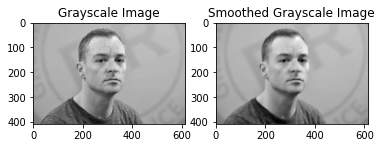

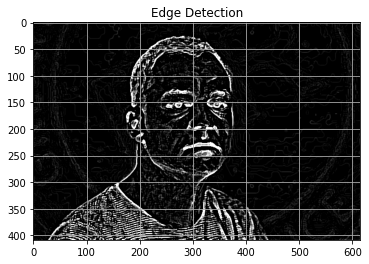

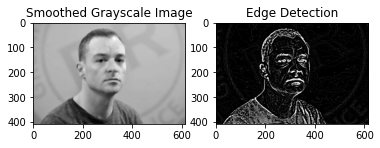

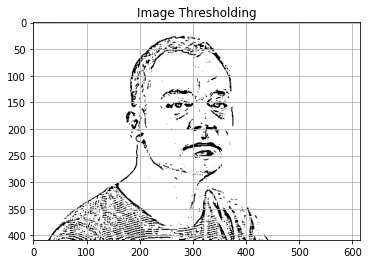

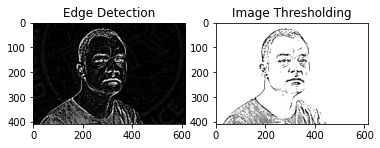

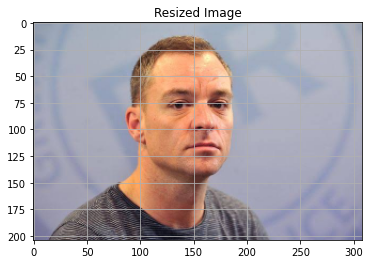

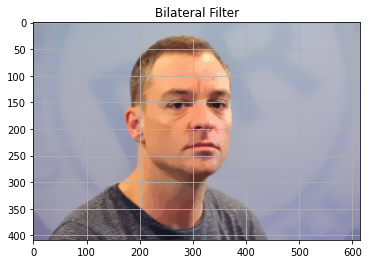

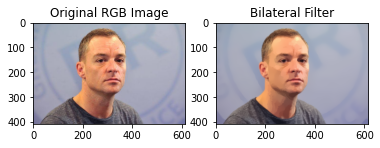

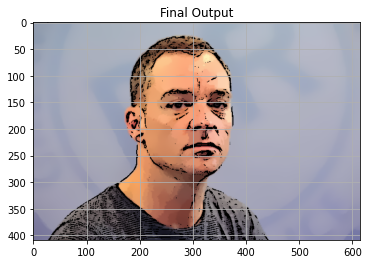

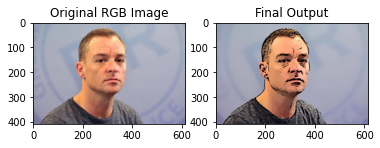

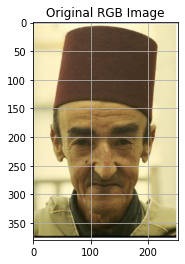

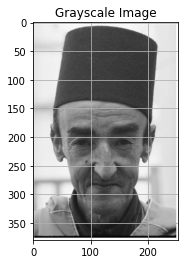

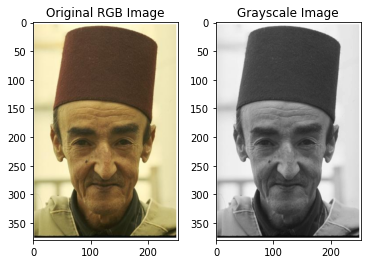

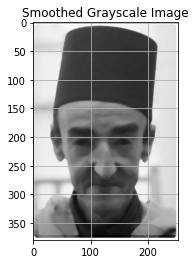

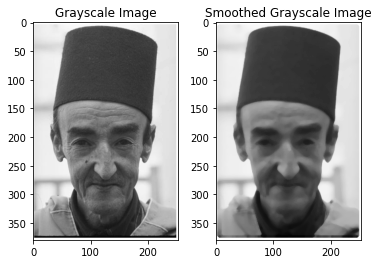

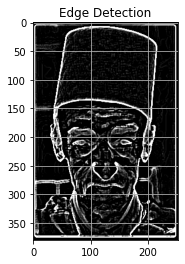

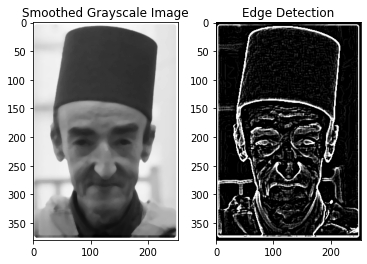

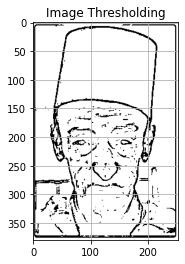

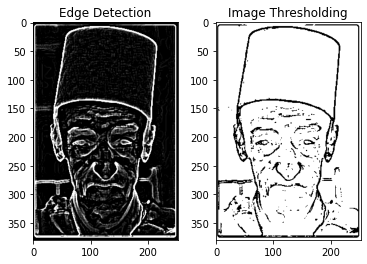

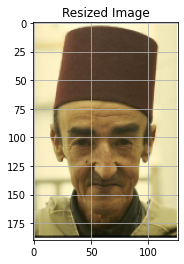

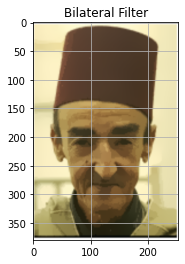

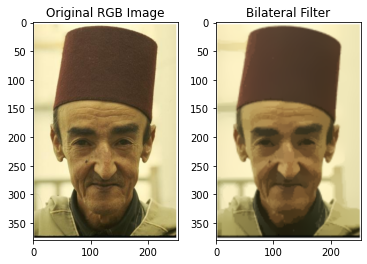

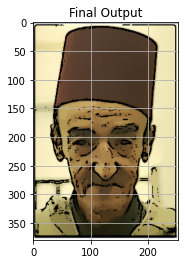

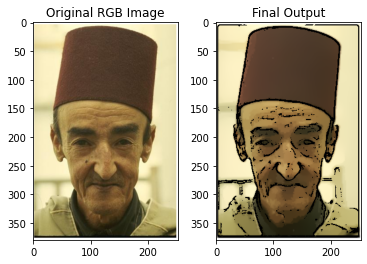

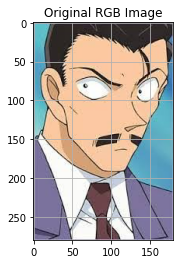

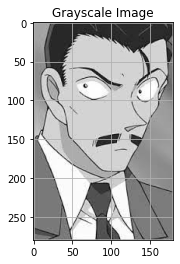

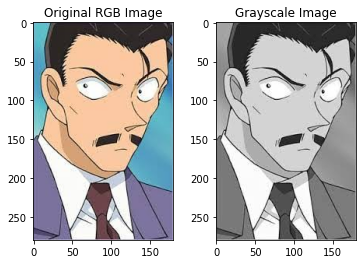

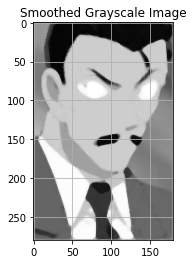

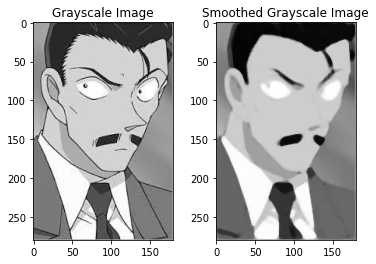

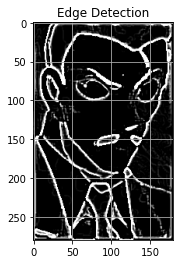

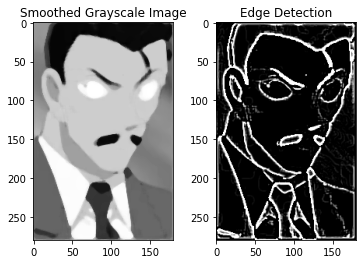

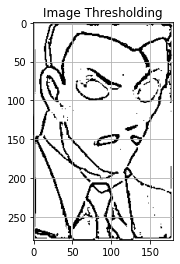

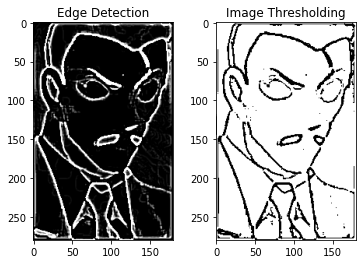

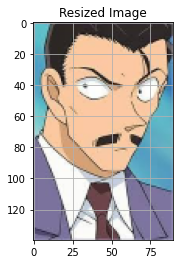

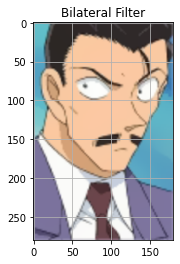

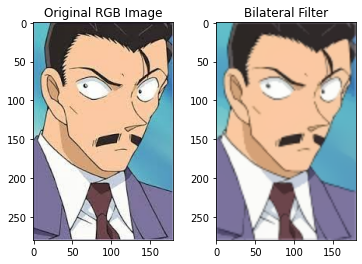

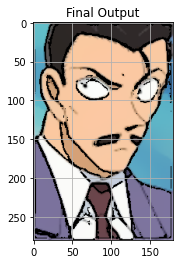

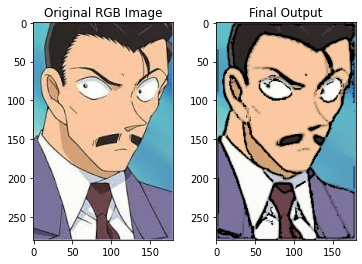

In [ ]:
import os
cartoon='/gdrive/My Drive/All/omarwasfy/Master2/DIP/Assignment1/cartoon'
os.chdir(cartoon)
for photo in os.listdir(cartoon): 
  image = cv.imread(photo)
  RGB_image=BGR2RGB(image)
  plot_image(RGB_image,"colored","Original RGB Image")
  gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  plot_image(gray_image,"gray","Grayscale Image")
  plot2Images(RGB_image,"Original RGB Image",gray_image,"Grayscale Image")
  median_image=cv.medianBlur(gray_image,7)
  plot_image(median_image,"gray","Smoothed Grayscale Image")
  #plot gray and median side by side
  plot2Images(gray_image,"Grayscale Image",median_image,"Smoothed Grayscale Image")
  laplacian_image = cv.Laplacian(median_image, ddepth=-1,ksize=5)
  plot_image(laplacian_image,"gray","Edge Detection")
  #plot median and laplacian side by side
  plot2Images(median_image,"Smoothed Grayscale Image",laplacian_image,"Edge Detection")
  ret,thresh = cv.threshold(laplacian_image,125,255,cv.THRESH_BINARY_INV)
  plot_image(thresh,"gray","Image Thresholding")
  #plot laplacian and thresholding side by side
  plot2Images(laplacian_image,"Edge Detection",thresh,"Image Thresholding")
  resized_image=cv.resize(image,(0,0),fx=0.5,fy=0.5)
  plot_image(BGR2RGB(resized_image),"colored","Resized Image")
  iterations=7
  for i in range(iterations):
    resized_image= cv.bilateralFilter(resized_image,d=9,sigmaColor=9,sigmaSpace=7)
  #bilateral_image=cv.pyrUp(resized_image) 
  bilateral_image=cv.resize(resized_image,(image.shape[1],image.shape[0]))
  plot_image(BGR2RGB(bilateral_image),"colored","Bilateral Filter")
  #plot original and bilateral side by side
  plot2Images(RGB_image,"Original RGB Image",BGR2RGB(bilateral_image),"Bilateral Filter")
  temp=cv.cvtColor(thresh,cv.COLOR_GRAY2BGR)
  cartoon=cv.bitwise_and(bilateral_image,temp)
  plot_image(BGR2RGB(cartoon),"colored","Final Output")
  #plot original and final output side by side
  plot2Images(RGB_image,"Original RGB Image",BGR2RGB(cartoon),"Final Output")

1
[(324, 57, 1) (84, 49, 23) (164, 289, 23) (191, 102, 23) (292, 164, 23)
 (112, 259, 26) (118, 113, 26) (222, 46, 26) (294, 276, 26) (37, 99, 29)
 (46, 277, 29) (98, 195, 29) (222, 237, 29) (302, 76, 29)]
2
[(33, 118, 23) (108, 40, 23) (167, 300, 23) (36, 210, 26) (102, 298, 26)
 (168, 220, 26) (174, 43, 26) (256, 295, 26) (258, 44, 26) (35, 42, 29)
 (37, 302, 29) (105, 123, 29) (105, 211, 29) (174, 120, 29) (260, 119, 29)
 (260, 214, 29)]
3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

[(73, 277, 38) (258, 66, 38) (68, 70, 42) (269, 255, 42) (169, 162, 47)]
4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

[(254, 187, 47) (132, 81, 52) (70, 275, 59)]
5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

[(84, 67, 1) (84, 69, 1) (96, 73, 1) (274, 148, 1) (336, 111, 1)
 (57, 86, 3) (261, 153, 3) (60, 277, 23) (97, 48, 23) (102, 251, 23)
 (118, 308, 23) (156, 235, 23) (175, 288, 25) (204, 86, 25) (224, 227, 25)
 (203, 87, 26) (224, 226, 26) (310, 65, 26) (318, 129, 26) (41, 59, 29)
 (43, 218, 29) (102, 190, 29) (254, 49, 29) (261, 121, 29) (276, 180, 29)]
6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

[(224, 260, 2) (226, 258, 2) (47, 294, 25) (93, 210, 25) (130, 63, 25)
 (203, 243, 25) (41, 50, 28) (129, 313, 28) (251, 274, 28) (290, 156, 28)
 (309, 285, 28) (175, 174, 31) (249, 54, 31)]
7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

[(78, 236, 1) (45, 130, 37) (204, 51, 37) (98, 53, 42) (158, 292, 42)
 (218, 177, 42) (112, 204, 47) (273, 292, 47) (287, 104, 47)]
8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

[(167, 265, 37) (211, 80, 37) (288, 209, 37) (53, 53, 42) (297, 300, 42)
 (76, 145, 47)]


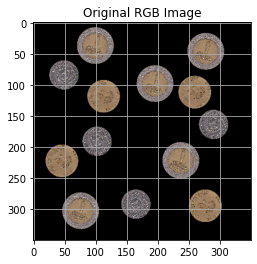

<Figure size 432x288 with 0 Axes>

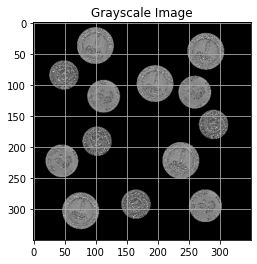

<Figure size 432x288 with 0 Axes>

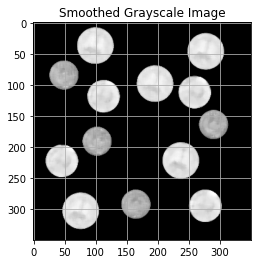

<Figure size 432x288 with 0 Axes>

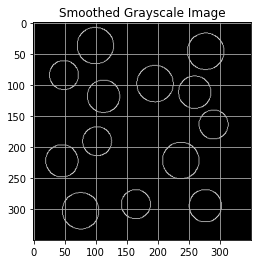

<Figure size 432x288 with 0 Axes>

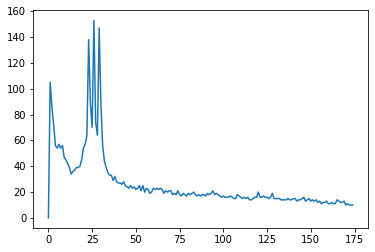

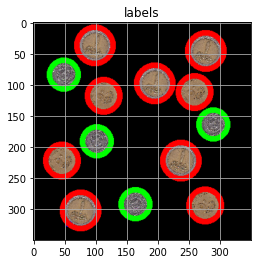

<Figure size 432x288 with 0 Axes>

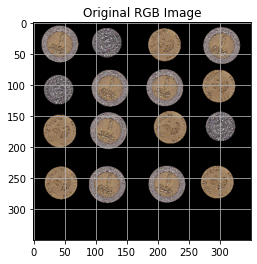

<Figure size 432x288 with 0 Axes>

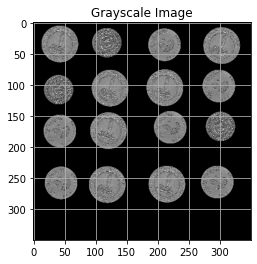

<Figure size 432x288 with 0 Axes>

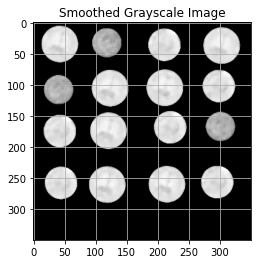

<Figure size 432x288 with 0 Axes>

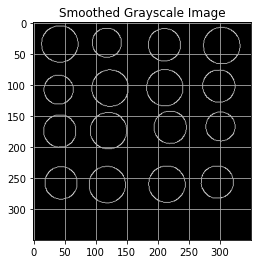

<Figure size 432x288 with 0 Axes>

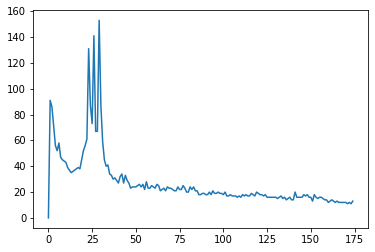

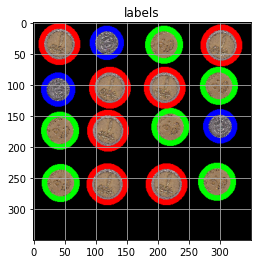

<Figure size 432x288 with 0 Axes>

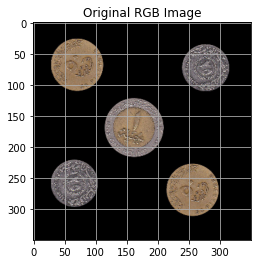

<Figure size 432x288 with 0 Axes>

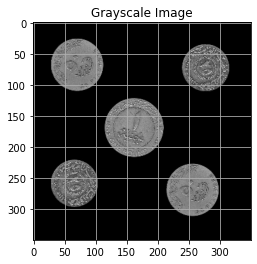

<Figure size 432x288 with 0 Axes>

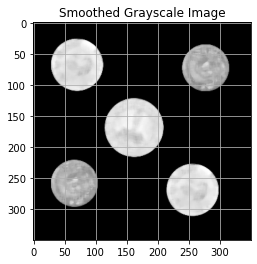

<Figure size 432x288 with 0 Axes>

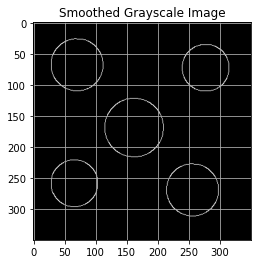

<Figure size 432x288 with 0 Axes>

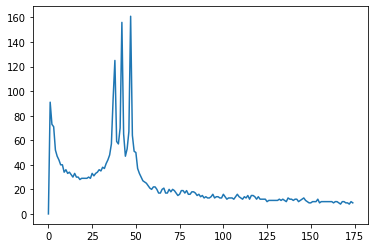

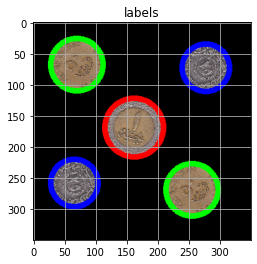

<Figure size 432x288 with 0 Axes>

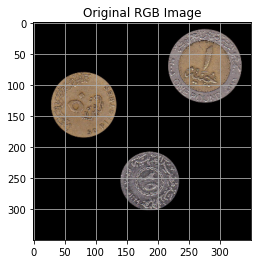

<Figure size 432x288 with 0 Axes>

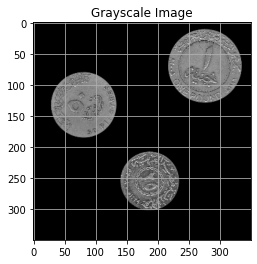

<Figure size 432x288 with 0 Axes>

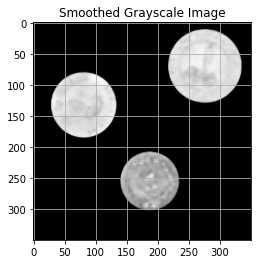

<Figure size 432x288 with 0 Axes>

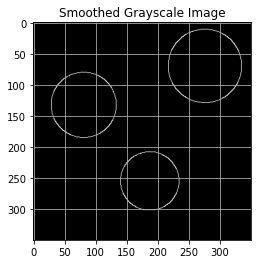

<Figure size 432x288 with 0 Axes>

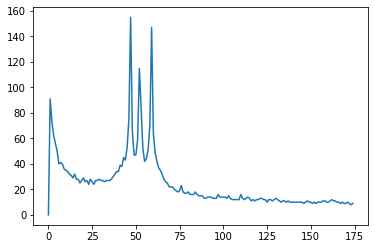

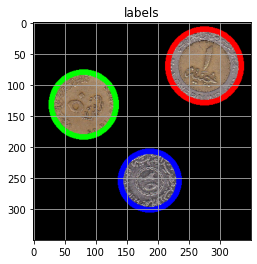

<Figure size 432x288 with 0 Axes>

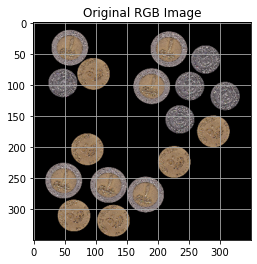

<Figure size 432x288 with 0 Axes>

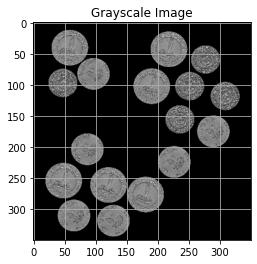

<Figure size 432x288 with 0 Axes>

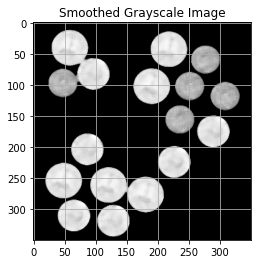

<Figure size 432x288 with 0 Axes>

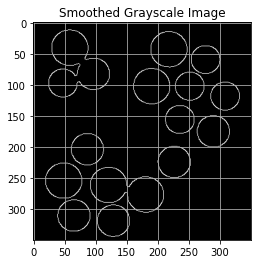

<Figure size 432x288 with 0 Axes>

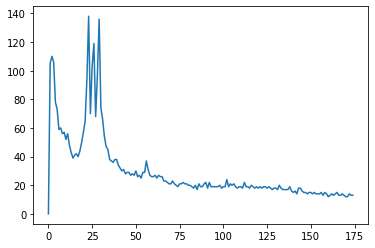

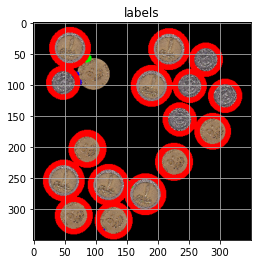

<Figure size 432x288 with 0 Axes>

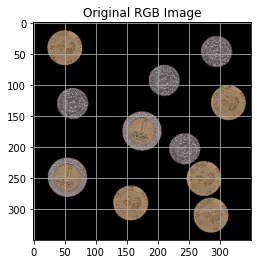

<Figure size 432x288 with 0 Axes>

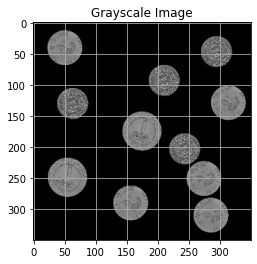

<Figure size 432x288 with 0 Axes>

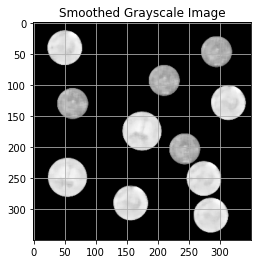

<Figure size 432x288 with 0 Axes>

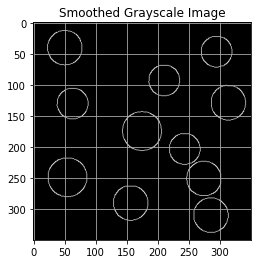

<Figure size 432x288 with 0 Axes>

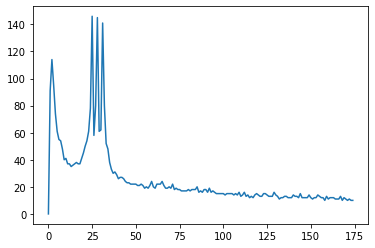

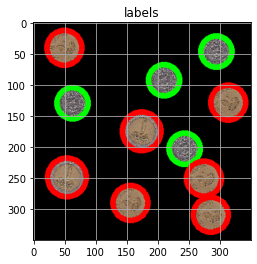

<Figure size 432x288 with 0 Axes>

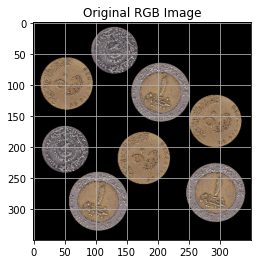

<Figure size 432x288 with 0 Axes>

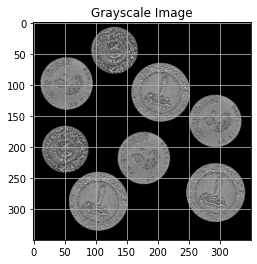

<Figure size 432x288 with 0 Axes>

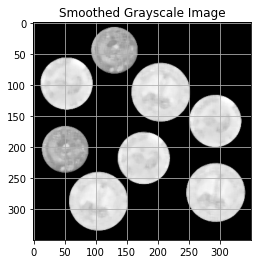

<Figure size 432x288 with 0 Axes>

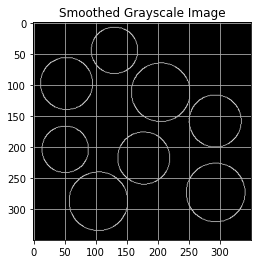

<Figure size 432x288 with 0 Axes>

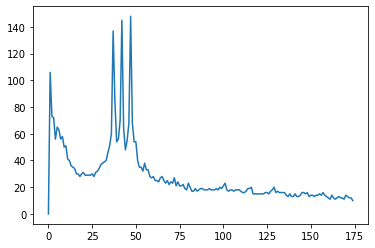

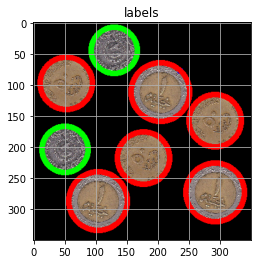

<Figure size 432x288 with 0 Axes>

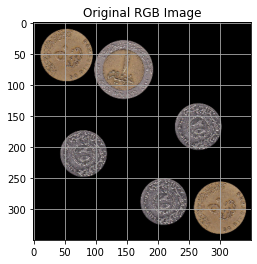

<Figure size 432x288 with 0 Axes>

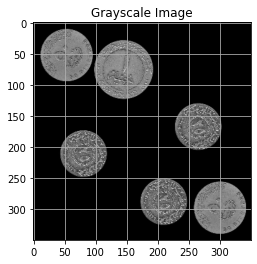

<Figure size 432x288 with 0 Axes>

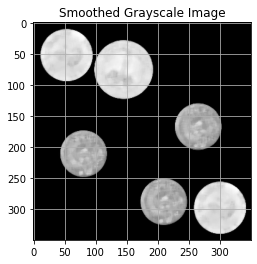

<Figure size 432x288 with 0 Axes>

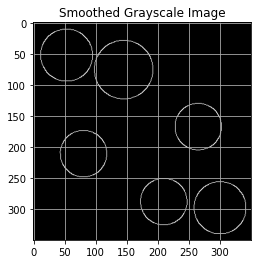

<Figure size 432x288 with 0 Axes>

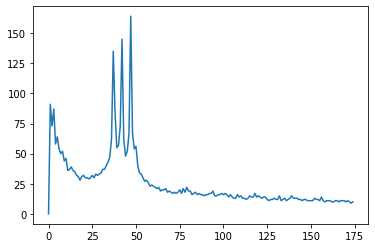

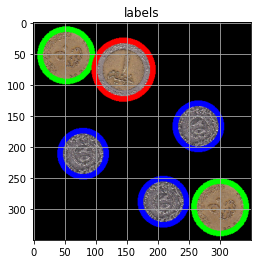

<Figure size 432x288 with 0 Axes>

In [ ]:
import os
import cv2 as cv
coins='/gdrive/My Drive/All/omarwasfy/Master2/DIP/Assignment1/coins'
os.chdir(coins)
i=0
for photo in os.listdir(coins):
  i=i+1
  print(i) 
  image = cv.imread(photo)
  RGB_image=BGR2RGB(image)
  #resizing image to lower sizes to reasonable search for 3 radiuses time
  image=cv.resize(image,(350,350))
  RGB_image=cv.resize(RGB_image,(350,350))
  plot_image(RGB_image,"colored","Original RGB Image")
  gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  plot_image(gray_image,"gray","Grayscale Image")
  #median filter smoothes the gray iamge
  median_image=cv.medianBlur(gray_image,7)
  plot_image(median_image,"gray","Smoothed Grayscale Image")
  #edge detection using canny
  edges=cv.Canny(median_image,250,280)
  plot_image(edges,"gray","Smoothed Grayscale Image")
  #detect all cirles in all searh space of r that has votes >=100
  detected_circles, detected_circles_radias = np.array(CHT(edges, 100))
  detected_circles_radias = np.array(detected_circles_radias)
  print(detected_circles)
  max_radius = np.amax(detected_circles_radias)
  min_radius = np.amin(detected_circles_radias)
  UniqueRadius=np.sort(np.unique(detected_circles_radias))
  copy=RGB_image
  for a,b,r in detected_circles:
    if r==UniqueRadius[0] :
      cv.circle(copy,(b,a),r,(0,0,255),7)
    elif r==UniqueRadius[1]:
      cv.circle(copy,(b,a),r,(0,255,0),7)
    else:
      cv.circle(copy,(b,a),r,(255,0,0),7)
  plot_image(copy,"colored",'labels')
    #what we would see is 3 peaks at r vs votes plot suggesting that all votes come to 3 unique Radius which in our case is the .25,.5,1 pound
    #we would also find in some images that another peeks at small r=1 and other r's but the fact that the correct 
    #3 radiuses are the maximal 3 votes 
    #if the images had more noises the problem will be harder but solvable as the photos taken vertical to plane which coin reside ,we have a known ratios between radiuses of 3 coins 
    # which is preserved in that uniform scaller transformation so if we searched for 3 radiuses peaks that have the same ratios they are likely to be our coins
    #the method to detect radiuses are pretty nieve because I assumed first that minmum peak is .25 which is not right , but given above facts we could easily handle that